In [ ]:
# need numpy 1 to stop numpy dtype size changed error
!pip install "pmdarima[all]" "numpy==1.26.4"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pmdarima.arima import auto_arima

In [134]:
#dat = pd.read_csv("https://media.githubusercontent.com/media/buds-lab/building-data-genome-project-2/refs/heads/master/data/meters/raw/electricity.csv")
dat = pd.read_csv("Final_cleaned_data.csv")
dat = dat[dat.columns.difference(["timestamp","month","year","total_energy","z_score"])]

In [135]:
dat

,Bear_assembly_Angel,Bear_assembly_Beatrice,Bear_assembly_Diana,Bear_assembly_Genia,Bear_assembly_Jose,Bear_assembly_Roxy,Bear_assembly_Ruby,Bear_education_Alfredo,Bear_education_Alvaro,Bear_education_Arnold,...,Wolf_office_Emanuel,Wolf_office_Haydee,Wolf_office_Joana,Wolf_office_Nadia,Wolf_office_Rochelle,Wolf_public_Norma,Wolf_retail_Harriett,Wolf_retail_Marcella,Wolf_retail_Toshia,Wolf_science_Alfreda
0,237.8500,9.00,1.148,178.7858,148.50,9.75,51.50,0.1025,358.4388,0.519,...,13.3400,4.9100,14.6900,50.9975,8.8600,72.8408,22.7300,9.8575,17.6575,87.6400
1,221.2500,10.25,1.148,184.0738,152.00,9.75,52.75,0.0950,355.8990,0.521,...,13.7975,5.1200,14.2425,49.9775,8.9625,67.0392,22.0200,9.6150,18.5775,87.1525
2,222.5000,10.00,1.148,184.9768,153.25,10.00,51.25,0.1025,328.1848,0.590,...,13.3550,4.7325,14.8850,49.3350,8.8200,72.3000,22.1100,9.4900,18.1275,86.9800
3,221.4000,9.00,1.148,184.6900,145.50,9.75,51.00,0.1025,326.3410,0.539,...,13.4625,6.6975,15.3775,50.6450,8.7475,74.5700,21.5050,9.6125,17.4000,87.1375
4,224.2500,10.00,1.148,187.0248,158.25,10.00,51.50,0.1175,325.4633,0.532,...,13.2375,7.0000,15.3375,50.9975,8.4475,71.1233,21.6750,9.4300,17.3875,86.6425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17422,319.2544,67.25,0.485,403.5352,226.50,7.00,68.75,0.1350,371.8235,0.674,...,10.1650,4.7800,15.3300,57.1650,7.2850,56.5333,27.8675,5.4975,18.1000,72.4275
17423,313.7506,66.25,0.429,396.6962,223.00,6.50,68.75,0.1300,371.2127,0.694,...,10.1250,4.7750,15.1600,56.0575,7.3775,63.7867,28.2650,5.2050,18.5750,73.4875
17424,309.0006,67.75,0.503,305.9935,163.50,6.25,68.00,0.1300,375.0352,0.665,...,10.1675,4.7925,14.8750,62.7975,7.1525,63.0400,28.2425,5.4175,19.0250,72.7675
17425,284.5062,41.00,0.424,195.5648,134.25,6.50,68.50,0.1325,371.4132,0.651,...,9.7475,4.5150,14.4775,54.6325,7.1075,62.6133,27.7850,5.0675,18.2100,72.5375


In [136]:
n_obs = dat.shape[0]
dat.describe()

,Bear_assembly_Angel,Bear_assembly_Beatrice,Bear_assembly_Diana,Bear_assembly_Genia,Bear_assembly_Jose,Bear_assembly_Roxy,Bear_assembly_Ruby,Bear_education_Alfredo,Bear_education_Alvaro,Bear_education_Arnold,...,Wolf_office_Emanuel,Wolf_office_Haydee,Wolf_office_Joana,Wolf_office_Nadia,Wolf_office_Rochelle,Wolf_public_Norma,Wolf_retail_Harriett,Wolf_retail_Marcella,Wolf_retail_Toshia,Wolf_science_Alfreda
count,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,...,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000,17427.000000
mean,475.512614,43.001669,0.895841,263.171142,256.839324,17.139645,69.322396,0.181675,419.480199,0.558730,...,15.069266,8.611415,14.812475,74.213365,16.060336,146.370242,44.954826,6.999018,70.855573,81.407314
std,167.056235,15.627458,0.346105,83.135726,71.874723,13.510549,13.243444,0.090678,61.854002,0.362696,...,6.277059,5.934817,4.973615,22.473195,8.872542,72.984441,18.720938,3.235011,50.579366,11.867284
min,36.500000,1.750000,0.260000,151.320800,126.000000,4.750000,34.750000,0.050000,219.976000,0.205000,...,2.712500,1.005000,3.625000,28.155000,1.932500,17.325000,5.905000,0.002500,7.285000,35.832500
25%,332.800500,34.250000,0.614000,205.913000,194.000000,9.250000,60.500000,0.117500,373.429300,0.363000,...,11.170000,4.408750,11.882500,57.465000,9.005000,79.367100,28.407500,4.697500,30.341250,73.348750
50%,468.500000,37.500000,0.735000,235.072700,248.500000,12.000000,68.250000,0.157500,418.412500,0.464000,...,13.265000,6.340000,14.887500,63.425000,12.270000,134.790000,40.975000,6.120000,39.857500,78.617500
75%,605.995850,55.000000,1.148000,286.830500,313.000000,19.000000,78.250000,0.220000,464.885000,0.545000,...,18.921250,10.862500,17.345000,93.473750,22.635000,205.643350,58.450000,8.622500,119.072500,88.033750
max,1105.600000,83.000000,2.514000,613.510000,533.250000,75.398000,118.000000,0.630000,600.598800,2.427000,...,45.545000,43.370000,30.580000,162.755000,45.350000,330.001700,130.637500,22.645000,206.440000,124.375000


In [137]:
maxes = np.array(dat.describe()[7:])
np.sort(maxes[np.isnan(maxes) == False])[-10:]

array([  8894.        ,  10114.        ,  10295.        ,  10725.        ,
        11019.        ,  11624.        ,  12576.        ,  16848.852     ,
        23947.33333333, 131230.48743719])

In [138]:
np.argwhere(np.isnan(maxes))

array([], shape=(0, 2), dtype=int64)

In [139]:
np.argmax(maxes[~np.isnan(maxes)])

153

In [140]:
maxes[0,1437]

591.0

In [141]:
for outlier in np.sort(maxes[np.isnan(maxes) == False])[-5:]:
  print(np.argwhere(dat.describe() == outlier))

[[  7 134]]
[[  7 215]]
[[  7 773]]
[[  7 161]]
[[  7 153]]


In [144]:
dat.describe()[dat.columns[773]]

,Hog_office_Nia
count,17427.000000
mean,1819.997445
std,907.675729
min,456.298000
25%,1130.705500
50%,1436.031000
75%,2354.926000
max,16848.852000


In [119]:
names = [name.split("_") for name in dat.columns]
lens = np.array([len(name) for name in names])

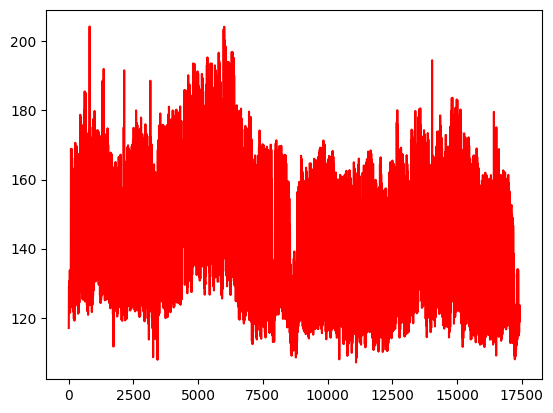

In [145]:
avg_series = dat[dat.columns.difference([dat.columns[i] for i in [153,161,773]])].mean(axis=1)
plt.plot(avg_series, "-r")

In [146]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [147]:
n_arimatrain = 14000
avgtrain = avg_series[:n_arimatrain]
avgtest = avg_series[n_arimatrain:]

In [148]:
m1 = auto_arima(avgtrain, d=1)

In [149]:
m1

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

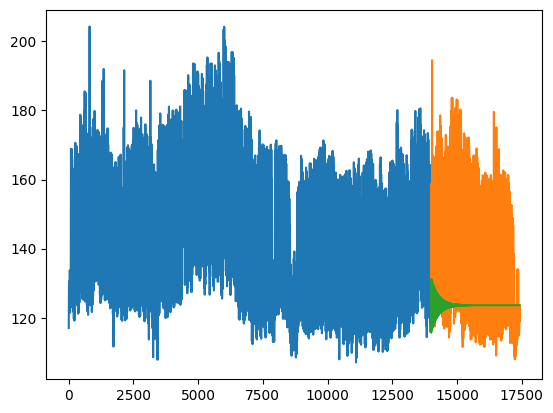

In [150]:
plt.plot(np.arange(n_arimatrain), avgtrain)
plt.plot(np.arange(n_arimatrain,n_obs), avgtest)
plt.plot(np.arange(n_arimatrain,n_obs), m1.predict(n_periods=avgtest.shape[0]))

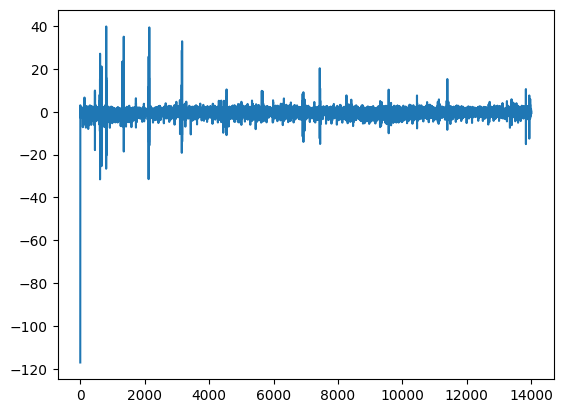

In [151]:
plt.plot(m1.predict_in_sample() - avgtrain)
#plt.plot(m1.predict(n_periods=avgtest.shape[0]) - avgtest)

In [152]:
def rmse(pred, real):
  return np.sqrt(((pred-real)**2).mean())

print(rmse(m1.predict_in_sample(), avgtrain), rmse(m1.predict(n_periods=avgtest.shape[0]), avgtest))

2.108274026912355 22.051944478143287


In [153]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                14000
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -28565.161
Date:                Sat, 26 Apr 2025   AIC                          57142.322
Time:                        22:09:36   BIC                          57187.602
Sample:                             0   HQIC                         57157.396
                              - 14000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2906      0.006    401.631      0.000       2.279       2.302
ar.L2         -1.6960      0.011   -158.375      0.000      -1.717      -1.675
ar.L3          0.3626      0.005     67.144      0.000       0.352       0.373
ma.L1         -1.7893      0.006   -294.184      0.000      -1.801      -1.777
ma.L2          0.8436      0.006    139.160      0.000       0.832       0.856
sigma2         3.4655      0.012    299.638      0.000       3.443       3.488
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):           4143585.04
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                            -1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        87.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [154]:
#plt.plot(dat[dat.columns[162]], "-r")

In [155]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTM is sensitive to scale
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_series = scaler.fit_transform(np.array(avg_series).reshape(-1, 1))

train_size = int(n_obs * 0.8)
train_scaled = scaled_series[:train_size]
test_scaled = scaled_series[train_size:]


# Y is the sequence; for every element of Y, X has a list with the previous look_back entries
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 4

X_train, Y_train = create_dataset(train_scaled, look_back)
X_test, Y_test = create_dataset(test_scaled, look_back)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=25, input_shape=(X_train.shape[1], 1)))
#model.add(LSTM(units=25))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=3, batch_size=1, verbose=1)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13936/13936 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 0.0053
Epoch 2/3
13936/13936 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 4.8437e-04
Epoch 3/3
13936/13936 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 5.0782e-04
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


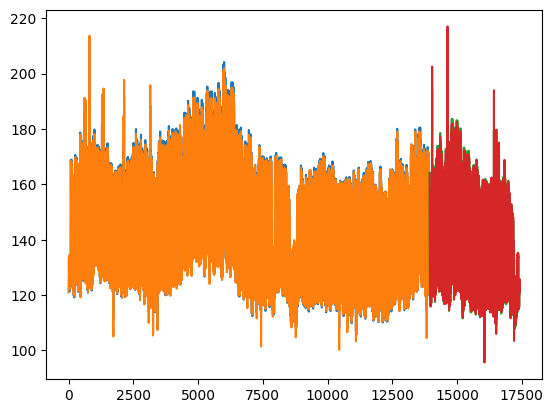

In [156]:
plt.plot(np.arange(train_size-look_back-1), Y_train[0])
plt.plot(np.arange(train_size-look_back-1), train_predict)
plt.plot(np.arange(train_size+look_back+1, n_obs), Y_test[0])
plt.plot(np.arange(train_size+look_back+1, n_obs), test_predict)
plt.show()

In [157]:
rmse(test_predict, Y_test[0])

24.78527271051332

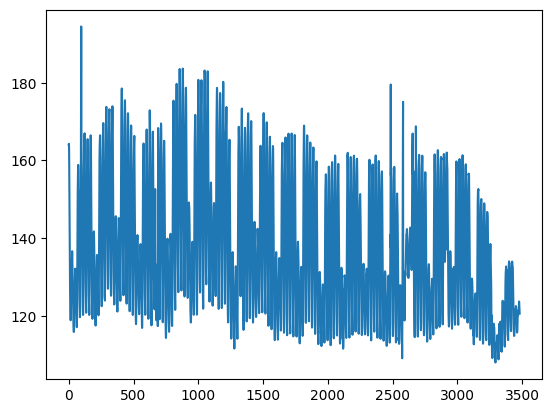

In [158]:
plt.plot(Y_test[0])

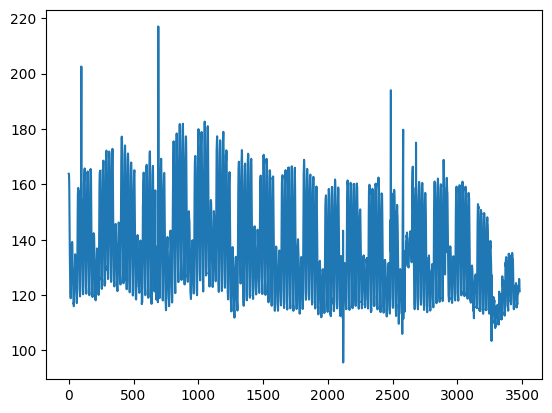

In [159]:
plt.plot(test_predict)

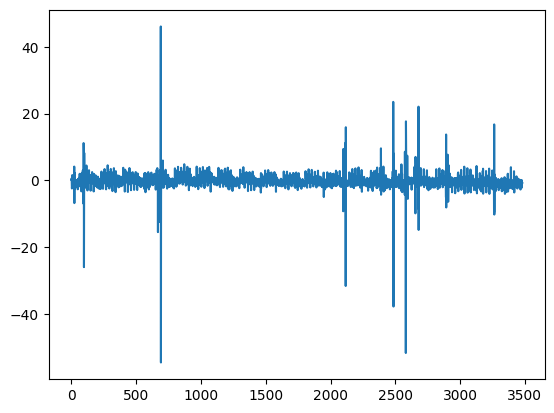

In [160]:
plt.plot(Y_test[0].flatten() - test_predict.flatten())

In [161]:
# determining whether first-order differencing suffices to make the series stationary (it does)
def avgdiffsc(series):
  diff = np.diff(series)
  return np.mean(diff[~np.isnan(diff)]) / np.max(series[~np.isnan(series)])

avgdiffs = dat[dat.columns.difference(["timestamp"])].apply(avgdiffsc)
avgdiffs

,0
Bear_assembly_Angel,2.525150e-06
Bear_assembly_Beatrice,1.624771e-05
Bear_assembly_Diana,-1.125340e-05
Bear_assembly_Genia,1.301063e-06
Bear_assembly_Jose,-1.318280e-06
...,...
Wolf_public_Norma,-1.797044e-06
Wolf_retail_Harriett,2.273237e-07
Wolf_retail_Marcella,-1.097915e-05
Wolf_retail_Toshia,3.891674e-08


In [162]:
max(avgdiffs)

5.519753226841599e-05

In [163]:
dat.mean(axis=1)

,0
0,118.542040
1,122.144357
2,122.123443
3,122.174605
4,122.516409
...,...
17422,124.289150
17423,123.479539
17424,122.656710
17425,121.957320
